In [8]:
import scipy.io
import numpy as np
import pandas as pd

# Load the .mat file
filename = 'osisaf_nh_SIE_monthly.mat'
data = scipy.io.loadmat(filename)

# Extract the relevant data fields from the loaded .mat file
SIE = data['Data']['SIE'][0, 0]  # Sea Ice Extent
years = data['Data']['year'][0, 0].flatten()  # Years
months = data['Data']['month'][0, 0].flatten()  # Months

# Replace the FillValue (-999) with NaN
SIE = np.where(SIE == -999, np.nan, SIE)

# Convert to a pandas DataFrame (optional, for easier data manipulation)
df = pd.DataFrame({
    'Year': years,
    'Month': months,
    'SIE': SIE.flatten()
})

# Display the first few rows of the DataFrame to ensure the data is loaded correctly
print(df.head())


   Year  Month         SIE
0  1979      1  15565635.0
1  1979      2  16287846.0
2  1979      3  16444950.0
3  1979      4  15619396.0
4  1979      5  14086220.0


In [15]:
# Find the difference between SIE september 1978 and now
sie_1978 = df[(df['Year'] == 1979) & (df['Month'] == 9)]['SIE'].values[0]
sie_now = df[(df['Year'] == 2021) & (df['Month'] == 9)]['SIE'].values[0]
sie_diff = sie_now - sie_1978
print(f'Difference in SIE between September 1978 and September 2021: {sie_diff:.2f} km^2')

Difference in SIE between September 1978 and September 2021: -1986896.00 km^2


In [17]:
# The observed linear relationship implies a sustained loss of 3 ± 0.3 square meters of September sea-ice area per metric ton of CO2 emission.
# Calculate the total CO2 emissions from 1979 to 2021

# CO2 emissions per metric ton of sea-ice area loss
emissions_per_area_loss_lower = 1 / ((3-0.3) / 1e6)  # metric tons per square meter
emissions_per_area_loss_upper = 1 / ((3+0.3) / 1e6)  # metric tons per square meter

# Calculate the total CO2 emissions from 1979 to 2021
total_emissions_lower = sie_diff * emissions_per_area_loss_lower
total_emissions_upper = sie_diff * emissions_per_area_loss_upper

print(f'Total CO2 emissions from 1979 to 2021 (lower bound): {total_emissions_lower:.2f} metric tons')
print(f'Total CO2 emissions from 1979 to 2021 (upper bound): {total_emissions_upper:.2f} metric tons')


Total CO2 emissions from 1979 to 2021 (lower bound): -735887407407.41 metric tons
Total CO2 emissions from 1979 to 2021 (upper bound): -602089696969.70 metric tons


C:\Users\danie\AppData\Local\Temp\ipykernel_2304\2796397324.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels, rotation=45, ha='right', fontsize=28)
C:\Users\danie\AppData\Local\Temp\ipykernel_2304\2796397324.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=28)
C:\Users\danie\AppData\Local\Temp\ipykernel_2304\2796397324.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(labels, rotation=45, ha='right', fontsize=28)


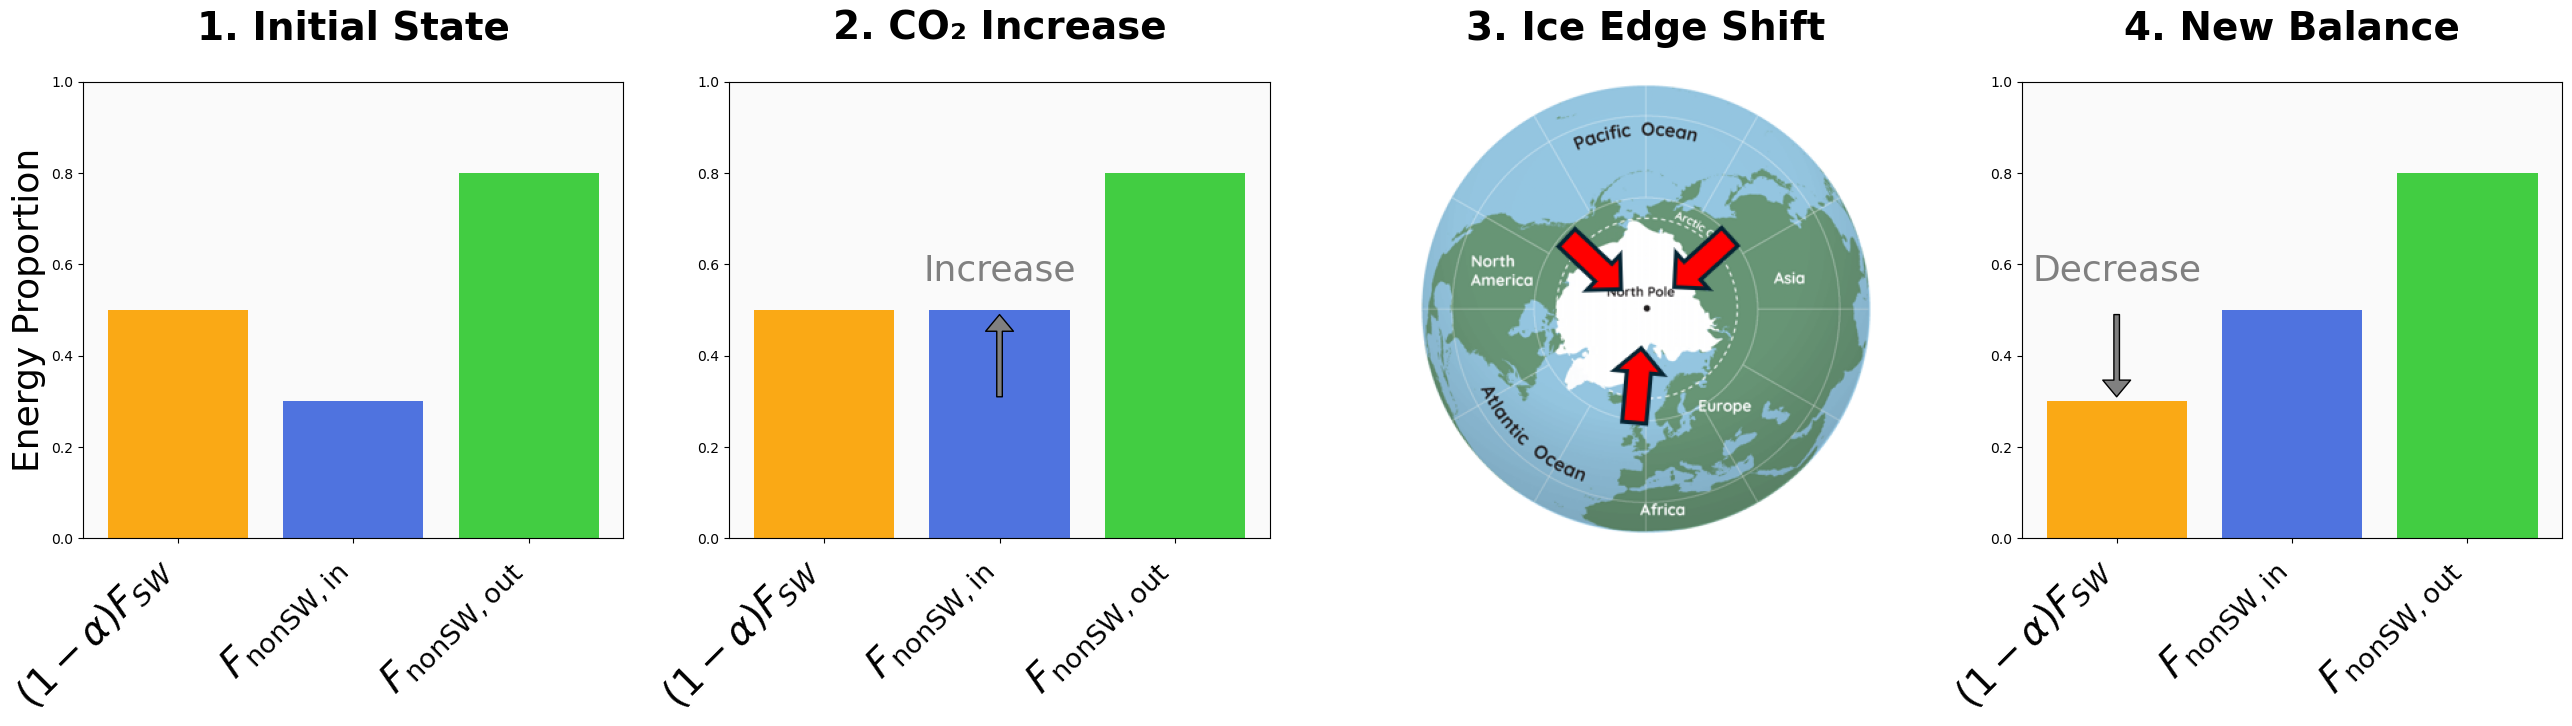

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

# Define the labels for each energy component with LaTeX formatting
labels = [
    r'$(1 - \alpha) F_{SW}$',
    r'$F_{\mathrm{nonSW,in}}$',
    r'$F_{\mathrm{nonSW,out}}$'
]

# Define values for each stage
# Before CO2 increase (initial equilibrium)
before_values = [0.5, 0.3, 0.8]

# After CO2 increase (increased F_nonSW,in, unbalanced)
after_increase_values = [0.5, 0.5, 0.8]

# Balanced state after CO2 increase (reduced (1-alpha) FSW to compensate)
balanced_values = [0.3, 0.5, 0.8]

# Softer color scheme: muted orange, blue, and green
colors = ['orange', 'royalblue', 'limegreen']  # Muted colors

# Adjust layout with different width ratios for the plots and the image
fig, ax = plt.subplots(1, 4, figsize=(26, 8), gridspec_kw={'width_ratios': [1, 1, 1, 1], 'height_ratios': [1]})

# Before CO2 Increase
ax[0].bar(labels, before_values, color=colors)
ax[0].set_ylim(0, 1)
ax[0].set_title('1. Initial State', fontsize=28, weight='bold', pad=30)
ax[0].set_ylabel('Energy Proportion', fontsize=26)
ax[0].set_xticklabels(labels, rotation=45, ha='right', fontsize=28)

# After CO2 Increase (Unbalanced)
ax[1].bar(labels, after_increase_values, color=colors)
ax[1].set_ylim(0, 1)
ax[1].set_title('2. CO₂ Increase', fontsize=28, weight='bold', pad=30)
ax[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=28)

# Load and display the image in the third subplot
image = mpimg.imread("iceeee.png")  # Load the image
ax[2].imshow(image)  # Display the image
ax[2].axis('off')  # Hide axes for the image
ax[2].set_title('3. Ice Edge Shift', fontsize=28, weight='bold', pad=30)

# Balanced State After CO2 Increase
ax[3].bar(labels, balanced_values, color=colors)
ax[3].set_ylim(0, 1)
ax[3].set_title('4. New Balance', fontsize=28, weight='bold', pad=30)
ax[3].set_xticklabels(labels, rotation=45, ha='right', fontsize=28)

# Add arrows to show increase in F_nonSW,in
ax[1].annotate('', xy=(1, 0.5), xytext=(1, 0.3),
               arrowprops=dict(facecolor='gray', shrink=0.05, width=4, headwidth=20))
ax[1].text(1, 0.55, 'Increase', ha='center', va='bottom', color='gray', fontsize=26)

# Add arrows to show the decrease in (1 - alpha) F_SW
ax[3].annotate('', xy=(0, 0.3), xytext=(0, 0.5),
               arrowprops=dict(facecolor='gray', shrink=0.05, width=4, headwidth=20))
ax[3].text(0, 0.55, 'Decrease', ha='center', va='bottom', color='gray', fontsize=26)

# Shaded area for each plot background to indicate the stages
for i in [0, 1, 3]:  # Apply shading to the bar plot subplots only
    ax[i].axhspan(0, 1, color='lightgrey', alpha=0.1)

# Adjust layout to fit everything nicely
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()
